In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score
import joblib

<h2 id="multiple_regression_model">Multiple Regression Model With Raw Data</h2>

In [51]:
dfMC=pd.read_csv("../Data/HouseImformation.csv")

In [52]:
dfMC.head(6)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33


In [53]:
dfMC["Area"]=dfMC["Area"].str.replace(',','').astype(float)

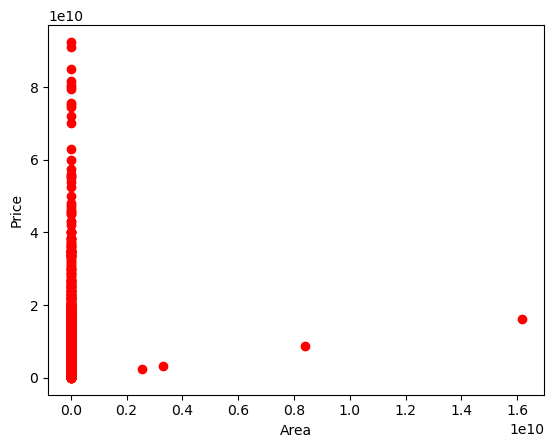

In [54]:
plt.scatter(dfMC["Area"],dfMC["Price"],color='red')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [55]:
iso=IsolationForest(contamination=0.001)
dfMC["OuterRow"] = iso.fit_predict(dfMC[["Area"]])

print(dfMC["OuterRow"].value_counts())

OuterRow
 1    3475
-1       4
Name: count, dtype: int64


In [56]:
dfMC[dfMC["OuterRow"] == -1]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),OuterRow
570,3.310000e+09,2,True,True,True,Ostad Moein,3.310000e+09,110333.33,-1
709,1.616000e+10,3,True,True,True,Pasdaran,1.616000e+10,538666.67,-1
1604,8.400000e+09,2,True,True,True,Gheitarieh,8.700000e+09,290000.00,-1
2802,2.550000e+09,2,True,True,True,Central Janatabad,2.550000e+09,85000.00,-1


In [57]:
dfMC=dfMC.drop(index=dfMC[dfMC["OuterRow"] == -1].index)

In [58]:
print(dfMC.isna().sum())

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
OuterRow       0
dtype: int64


In [59]:
dfMC=dfMC.dropna()

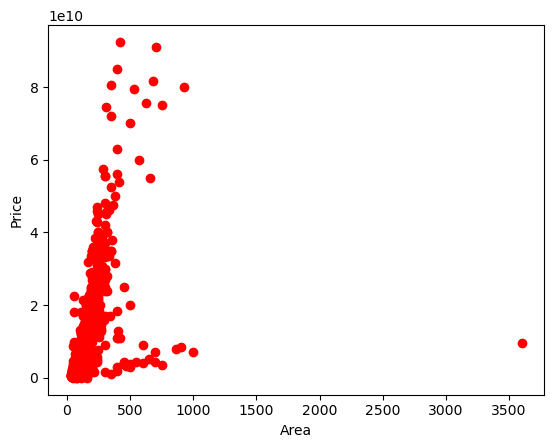

In [60]:
plt.scatter(dfMC["Area"],dfMC["Price"],color='red')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [61]:
MeanPriceAddress=dfMC.groupby("Address")["Price"].mean()
dfMC["MeanPriceA"] = dfMC["Address"].map(MeanPriceAddress)

In [62]:
mask= np.random.rand(len(dfMC)) < 0.8

train=dfMC[mask]
test=dfMC[~mask]

x_train=np.asanyarray(train[['Area','Room','Parking','Warehouse','Elevator','MeanPriceA']])
y_train=np.asanyarray(train[['Price']])

x_test=np.asanyarray(test[['Area','Room','Parking','Warehouse','Elevator','MeanPriceA']])
y_test=np.asanyarray(test[['Price']])

In [64]:
multiReg = linear_model.LinearRegression()

multiReg.fit(x_train,y_train)

y_predict=multiReg.predict(x_test)


print(multiReg.coef_)
print("R2-score: %.2f" % r2_score(y_test , y_predict))


[[ 1.98292365e+07  2.40001158e+09 -2.85986057e+08  2.43650353e+08
  -5.09567183e+08  7.53750227e-01]]
R2-score: 0.66


In [65]:
joblib.dump(multiReg, '../Models/LinearRegMiniCleanModel.pkl')

['../Models/LinearRegMiniCleanModel.pkl']

<h2 id="multiple_regression_model">Multiple Regression Model WithOut Outer Data</h2>

In [3]:
dfOuter=pd.read_csv("../Data/HouseImformation.csv")

In [4]:
dfOuter['Area'] = dfOuter['Area'].str.replace(',', '').astype(float)

In [5]:
dfOuter=dfOuter.dropna()

In [6]:
iso=IsolationForest(contamination=0.01)
dfOuter['OuterData']=iso.fit_predict(dfOuter[["Area", "Price"]])

In [7]:
print(dfOuter['OuterData'].value_counts())

OuterData
 1    3421
-1      35
Name: count, dtype: int64


In [8]:
dfOuter=dfOuter.drop(index=dfOuter[dfOuter['OuterData'] == -1].index)

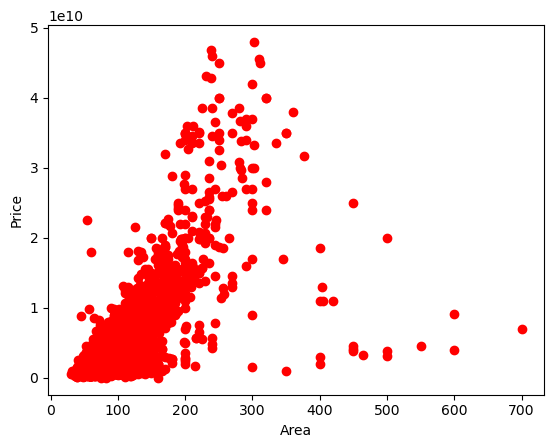

In [9]:
plt.scatter(dfOuter["Area"],dfOuter["Price"],color='red')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [10]:
MeanPriceAddress=dfOuter.groupby("Address")["Price"].mean()
dfOuter["MeanPriceA"] = dfOuter["Address"].map(MeanPriceAddress)

In [11]:
mask= np.random.rand(len(dfOuter)) < 0.8

train=dfOuter[mask]
test=dfOuter[~mask]

x_train=np.asanyarray(train[['Area','Room','Parking','Warehouse','Elevator','MeanPriceA']])
y_train=np.asanyarray(train[['Price']])

x_test=np.asanyarray(test[['Area','Room','Parking','Warehouse','Elevator','MeanPriceA']])
y_test=np.asanyarray(test[['Price']])

In [12]:
multiReg = linear_model.LinearRegression()

multiReg.fit(x_train,y_train)

y_predict=multiReg.predict(x_test)


print(multiReg.coef_)
print("R2-score: %.2f" % r2_score(y_test , y_predict))

[[ 4.02619896e+07  7.23463151e+08 -4.02936762e+08  3.81083511e+08
   1.39212611e+08  7.20354666e-01]]
R2-score: 0.75


In [13]:
joblib.dump(multiReg, '../Models/LinearRegCleanedModel.pkl')

['../Models/LinearRegCleanedModel.pkl']

<h2 id="multiple_regression_model">Multiple Regression Model with Raw Data</h2>

In [15]:
dfRaw=pd.read_csv("../Data/HouseImformation.csv")

In [16]:
dfRaw=dfRaw.dropna()

In [18]:
MeanPriceAddress=dfRaw.groupby("Address")["Price"].mean()
dfRaw["MeanPriceA"] = dfRaw["Address"].map(MeanPriceAddress)

In [19]:
mask= np.random.rand(len(dfOuter)) < 0.8

train=dfOuter[mask]
test=dfOuter[~mask]

x_train=np.asanyarray(train[['Area','Room','Parking','Warehouse','Elevator','MeanPriceA']])
y_train=np.asanyarray(train[['Price']])

x_test=np.asanyarray(test[['Area','Room','Parking','Warehouse','Elevator','MeanPriceA']])
y_test=np.asanyarray(test[['Price']])

In [20]:
multiReg = linear_model.LinearRegression()

multiReg.fit(x_train,y_train)

y_predict=multiReg.predict(x_test)


print(multiReg.coef_)
print("R2-score: %.2f" % r2_score(y_test , y_predict))

[[ 4.51653614e+07  5.77554588e+08 -4.39629215e+08  2.64912318e+08
   1.33077859e+08  7.10220656e-01]]
R2-score: 0.70
